# HW 2: Wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [7]:
from google.colab import files
uploaded = files.upload()

Saving airbnb_hw.csv to airbnb_hw.csv


In [10]:
import numpy as np # Import the numpy package into my workspace
import matplotlib.pyplot as plt # Import matplotlib into my workspace
import pandas as pd  # Import the pandas package into my workspace


df = pd.read_csv('airbnb_hw.csv',low_memory=False)

print(df.shape, '\n')
print(df.dtypes, '\n')
print(df.columns, '\n')

(30478, 13) 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object') 



['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

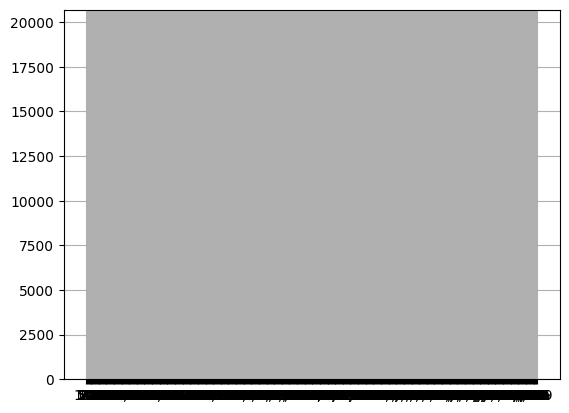

In [12]:
var = 'Price'
print(df[var].unique(),'\n')
print(df[var].hist(), '\n')

In [18]:
#the data above shows that the issue with missing values is because of the "," that occurs when numbers go past 999, we can strip these from the dataset to clean them.
df['Price'] = df['Price'].str.replace(',', '', regex=False)
var = 'Price'
print(df[var].unique(),'\n') #this shows commas are removed

#check how many missing values there are
df['Price'].isna().sum()

df.info()

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' '47

1. After removing commas there are 0 missing values in the Price column of the data set, since the total number of rows is 30478 and the total non-null are 30478.

In [19]:
from google.colab import files
uploaded = files.upload()

Saving mn_police_use_of_force.csv to mn_police_use_of_force.csv


In [38]:
import numpy as np # Import the numpy package into my workspace
import matplotlib.pyplot as plt # Import matplotlib into my workspace
import pandas as pd  # Import the pandas package into my workspace


df = pd.read_csv('mn_police_use_of_force.csv',low_memory=False)

print(df.shape, '\n')
print(df.dtypes, '\n')
print(df.columns, '\n')
df.head()

df['subject_injury'].value_counts(dropna=False)

(12925, 13) 

response_datetime     object
problem               object
is_911_call           object
primary_offense       object
subject_injury        object
force_type            object
force_type_action     object
race                  object
sex                   object
age                  float64
type_resistance       object
precinct               int64
neighborhood          object
dtype: object 

Index(['response_datetime', 'problem', 'is_911_call', 'primary_offense',
       'subject_injury', 'force_type', 'force_type_action', 'race', 'sex',
       'age', 'type_resistance', 'precinct', 'neighborhood'],
      dtype='object') 



,count
subject_injury,
NaN,9848
Yes,1631
No,1446


In [39]:
var = 'subject_injury'
print(df[var].unique(),'\n') #this shows all unique entries


[nan 'No' 'Yes'] 



In [41]:


df['subject_injury_clean'] = df['subject_injury'].replace({
    'Yes': 'Yes',
    'No': 'No',
    1: 'Yes',
    1.0: 'Yes',
    0: 'No',
    0.0: 'No'})

df['injury_nan'] = df['subject_injury_clean'].isna()
df['injury_nan'].sum()
df['injury_nan'].mean()  # proportion missing

df['injury_missing'] = df['subject_injury_clean'].isna()

pd.crosstab(
    df['force_type'],
    df['injury_missing'],
    normalize='index'
)

injury_missing,False,True
force_type,,
Baton,0.500000,0.500000
Bodily Force,0.252280,0.747720
Chemical Irritant,0.107972,0.892028
Firearm,1.000000,0.000000
Gun Point Display,0.740385,0.259615
Improvised Weapon,0.500000,0.500000
Less Lethal,0.000000,1.000000
Less Lethal Projectile,1.000000,0.000000
Maximal Restraint Technique,0.000000,1.000000


2. Based on the value counts that was done above, 9848 / 12925 = 76.2% missing data, which shows that its a big concern for this data set. Even if the data set for subject injuries column is cleaned, there is a correlation between the types of force and what happens as seen by the proportions in either column in which there was a missing value in the cross-tab. I think that these kinds of ambiguities in tasers, body force, less lethal, and maximal restraint show that especially in highly contentious topics there is more ambiguity reported because it can be hard to say if it was an injury or not in black and white terms.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?